<a href="https://colab.research.google.com/github/Ben-Ogega/Natural_Language_Processing/blob/main/nltk_sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

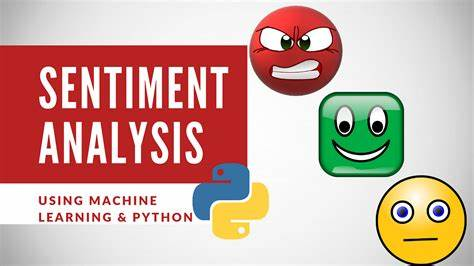

# **Sentiment Analysis - Amazon Fine Food Reviews**
##This is a simple example of how to perform sentiment analysis using **NLTK and RoBERTa**

## Import the necesssary libraries and frameworks

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')
import nltk

### Import the dataset form Kaggle


In [2]:
!pip install -q kaggle

In [3]:
from google.colab import files
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"benogega","key":"f5ddd24e0b043a997fb623e2b79a7ed3"}'}

## Code: Uploading the kaggle.json file

In [4]:
!mkdir -p ~/.kaggle


In [5]:
!cp kaggle.json ~/.kaggle/


In [6]:
!chmod 600 ~/.kaggle/kaggle.json

In [7]:
!kaggle datasets download -d snap/amazon-fine-food-reviews

 92% 223M/242M [00:01<00:00, 119MB/s]
100% 242M/242M [00:01<00:00, 144MB/s]


In [8]:
import zipfile

## The procedure below has been deprecated

In [9]:
# from zipfile import *
# zf = zipfile.ZipFile("amazon-fine-food-reviews.zip",'w', compression=zipfile.ZIP_DEFLATED)
# zf.write("FileTobeZipped.txt")
# zf.close()


# # # #set filename
# # # fpath = '{}_{}_{}.zip'.format(strDate, day, week)

# # # #use zipfile to get info about ftp file
# # # zip = zipfile.ZipFile(fpath, mode='r')

In [10]:
!unzip amazon-fine-food-reviews.zip

Archive:  amazon-fine-food-reviews.zip
  inflating: Reviews.csv             
  inflating: database.sqlite         
  inflating: hashes.txt              


In [11]:

df = pd.read_csv("/content/Reviews.csv")
df.head()


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


## **Read In Data**

In [ ]:
df.head()

# **Exploratory Data Analysis - EDA**

In [13]:
df.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [15]:
df['Score'].value_counts()

5    363122
4     80655
1     52268
3     42640
2     29769
Name: Score, dtype: int64

## **Visualize the Scores-Ratings**

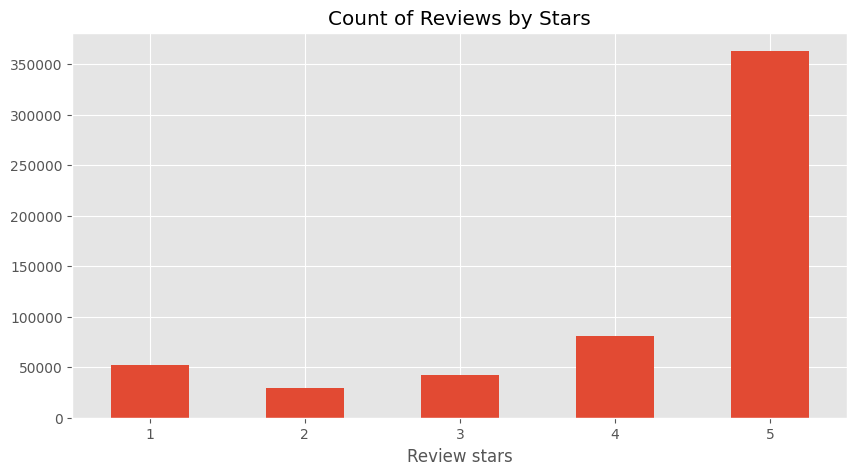

In [21]:
axs = df['Score'].value_counts().sort_index().plot(kind='bar',
                                                   title='Count of Reviews by Stars',
                                                   figsize=(10,5))
axs.set_xlabel('Review stars')
plt.xticks(rotation='horizontal')
plt.show()

## The reviews are biased towards the positive ratings

## **Basic Natural Language Tool Kit - NLTK**

In [23]:
# Lets pick one text and analyze the sentiment
example = df['Text'][30] # pick the 30th text

In [26]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [28]:
#Lets Tonekize the text
tokens = nltk.word_tokenize(example)
tokens[:10]

['I', 'have', 'never', 'been', 'a', 'huge', 'coffee', 'fan', '.', 'However']

## **Parts Of Speech Tagging - POS tags**

In [30]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [32]:
tagged = nltk.pos_tag(tokens)
tagged[:10]

[('I', 'PRP'),
 ('have', 'VBP'),
 ('never', 'RB'),
 ('been', 'VBN'),
 ('a', 'DT'),
 ('huge', 'JJ'),
 ('coffee', 'NN'),
 ('fan', 'NN'),
 ('.', '.'),
 ('However', 'RB')]

In [37]:
nltk.download('maxent_ne_chunker')

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.


True

In [39]:
nltk.download('words')

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


True

In [40]:
# Create chunks of Named Entities

entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S
  I/PRP
  have/VBP
  never/RB
  been/VBN
  a/DT
  huge/JJ
  coffee/NN
  fan/NN
  ./.
  However/RB
  ,/,
  my/PRP$
  mother/NN
  purchased/VBD
  this/DT
  little/JJ
  machine/NN
  and/CC
  talked/VBD
  me/PRP
  into/IN
  trying/VBG
  the/DT
  (ORGANIZATION Latte/NNP Macciato/NNP)
  ./.
  (PERSON No/NNP Coffee/NNP Shop/NNP)
  has/VBZ
  a/DT
  better/JJR
  one/CD
  and/CC
  I/PRP
  like/VBP
  most/JJS
  of/IN
  the/DT
  other/JJ
  products/NNS
  ,/,
  too/RB
  (/(
  as/IN
  a/DT
  usually/RB
  non-coffee/JJ
  drinker/NN
  !/.
  )/)
  ./.
  </JJ
  br/NN
  //NNP
  >/VBZ
  The/DT
  little/JJ
  (PERSON Dolche/NNP Guesto/NNP Machine/NNP)
  is/VBZ
  super/JJ
  easy/JJ
  to/TO
  use/VB
  and/CC
  prepares/VBZ
  a/DT
  really/RB
  good/JJ
  Coffee/Latte/Cappuccino/etc/NNP
  in/IN
  less/JJR
  than/IN
  a/DT
  minute/NN
  (/(
  if/IN
  water/NN
  is/VBZ
  heated/VBN
  up/RP
  )/)
  ./.
  I/PRP
  would/MD
  recommend/VB
  the/DT
  (ORGANIZATION Dolce/NNP Gusto/NNP)
  to/TO
  anyone/NN
  ./.
  To

## **V**alence **A**ware **D**ictionary and s**E**ntiment **R**easoner - **VADER**

NLTK's SentimentIntensityAnalyzer approach will give us the positive/negative/neutral scores of the text.

Stop words are removed and each word is scored and combined to give a total


In [43]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

In [45]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [46]:
# Creating the Instance of the SentimentIntensityAnalyzer

sentiment_intensity_analyzer = SentimentIntensityAnalyzer()

In [50]:
sentiment_intensity_analyzer.polarity_scores('This is the worst thing ever!')

{'neg': 0.468, 'neu': 0.532, 'pos': 0.0, 'compound': -0.6588}

In [52]:
sentiment_intensity_analyzer.polarity_scores(example)

{'neg': 0.041, 'neu': 0.692, 'pos': 0.267, 'compound': 0.9713}

In [54]:
df.shape

(568454, 10)

## **Run The Polarity Scores In Our Datasets**

In [67]:
# For the first 500 texts out of the 568,454 reviews
results = {}
sampled_df = df.head(500)
sampled_df.shape

(500, 10)

In [68]:
for i, row in tqdm(sampled_df.iterrows(), total=len(sampled_df)):
  text = row['Text']
  myid = row['Id']
  results[myid] = sentiment_intensity_analyzer.polarity_scores(text)


  0%|          | 0/500 [00:00<?, ?it/s]

In [69]:
results

{1: {'neg': 0.0, 'neu': 0.695, 'pos': 0.305, 'compound': 0.9441},
 2: {'neg': 0.138, 'neu': 0.862, 'pos': 0.0, 'compound': -0.5664},
 3: {'neg': 0.091, 'neu': 0.754, 'pos': 0.155, 'compound': 0.8265},
 4: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 5: {'neg': 0.0, 'neu': 0.552, 'pos': 0.448, 'compound': 0.9468},
 6: {'neg': 0.029, 'neu': 0.809, 'pos': 0.163, 'compound': 0.883},
 7: {'neg': 0.034, 'neu': 0.693, 'pos': 0.273, 'compound': 0.9346},
 8: {'neg': 0.0, 'neu': 0.52, 'pos': 0.48, 'compound': 0.9487},
 9: {'neg': 0.0, 'neu': 0.851, 'pos': 0.149, 'compound': 0.6369},
 10: {'neg': 0.0, 'neu': 0.705, 'pos': 0.295, 'compound': 0.8313},
 11: {'neg': 0.017, 'neu': 0.846, 'pos': 0.137, 'compound': 0.9746},
 12: {'neg': 0.113, 'neu': 0.887, 'pos': 0.0, 'compound': -0.7579},
 13: {'neg': 0.031, 'neu': 0.923, 'pos': 0.046, 'compound': 0.296},
 14: {'neg': 0.0, 'neu': 0.355, 'pos': 0.645, 'compound': 0.9466},
 15: {'neg': 0.104, 'neu': 0.632, 'pos': 0.264, 'compound': 0.6486},
 

## **Convert the Results Dictionary to a Pandas DataFrame**

In [70]:
pd.DataFrame(results)

,1,2,3,4,5,6,7,8,9,10,...,491,492,493,494,495,496,497,498,499,500
neg,0.0000,0.1380,0.0910,0.0,0.0000,0.029,0.0340,0.0000,0.0000,0.0000,...,0.0550,0.0000,0.0560,0.1000,0.0000,0.0000,0.0590,0.0250,0.041,0.0000
neu,0.6950,0.8620,0.7540,1.0,0.5520,0.809,0.6930,0.5200,0.8510,0.7050,...,0.7040,0.7170,0.8550,0.6450,0.7880,0.5540,0.7990,0.7620,0.904,0.6780
pos,0.3050,0.0000,0.1550,0.0,0.4480,0.163,0.2730,0.4800,0.1490,0.2950,...,0.2410,0.2830,0.0890,0.2540,0.2120,0.4460,0.1420,0.2120,0.055,0.3220
compound,0.9441,-0.5664,0.8265,0.0,0.9468,0.883,0.9346,0.9487,0.6369,0.8313,...,0.9287,0.9367,0.5976,0.6486,0.9743,0.9725,0.7833,0.9848,0.128,0.9811


### The **T** attribute is used to transpose the rows and columns of a DataFrame, effectively switching the rows and columns.

In [71]:
pd.DataFrame(results).T

,neg,neu,pos,compound
1,0.000,0.695,0.305,0.9441
2,0.138,0.862,0.000,-0.5664
3,0.091,0.754,0.155,0.8265
4,0.000,1.000,0.000,0.0000
5,0.000,0.552,0.448,0.9468
...,...,...,...,...
496,0.000,0.554,0.446,0.9725
497,0.059,0.799,0.142,0.7833
498,0.025,0.762,0.212,0.9848
499,0.041,0.904,0.055,0.1280


In [86]:
vaders = pd.DataFrame(results).T
vaders.reset_index().rename(columns={'index' : 'Id'})
# vaders.reset_index().rename(columns={'old_column_name': 'new_column_name'})

,Id,neg,neu,pos,compound
0,1,0.000,0.695,0.305,0.9441
1,2,0.138,0.862,0.000,-0.5664
2,3,0.091,0.754,0.155,0.8265
3,4,0.000,1.000,0.000,0.0000
4,5,0.000,0.552,0.448,0.9468
...,...,...,...,...,...
495,496,0.000,0.554,0.446,0.9725
496,497,0.059,0.799,0.142,0.7833
497,498,0.025,0.762,0.212,0.9848
498,499,0.041,0.904,0.055,0.1280


In [100]:
#Merge vaders with the sampled dataset
# vaders = vaders.merge(sampled_df, how='left')
